In [1]:
library('rmutil')
library('lmtest')


Attaching package: ‘rmutil’

The following object is masked from ‘package:stats’:

    nobs

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
alphas <- vector(length = 0)
alpha <- 0.05
tries <- 1000
for (n in seq(1000, 10000, by = 1000)) {
    errors_counter = 0
    for (i in 1:tries) {
        m <- 5
        theta <- matrix(rep(1, m))
        errors <- rlaplace(n = n, s = 0.2)
        X <- matrix(rep(1, n * m), ncol=m)
        Y <- X %*% theta + errors
        data <- cbind(X, Y)
        colnames(data) <- c("V1", "V2", "V3", "V4", "V5", "V6")
        data <- data.frame(data)
        model <- lm(formula = V6 ~ V1 + V2 + V3 + V4 + V5, data = data)
        if (gqtest(model)$p.value < alpha) {
            errors_counter <- errors_counter + 1
        }
    }
    alphas <- c(alphas, errors_counter / tries)
}

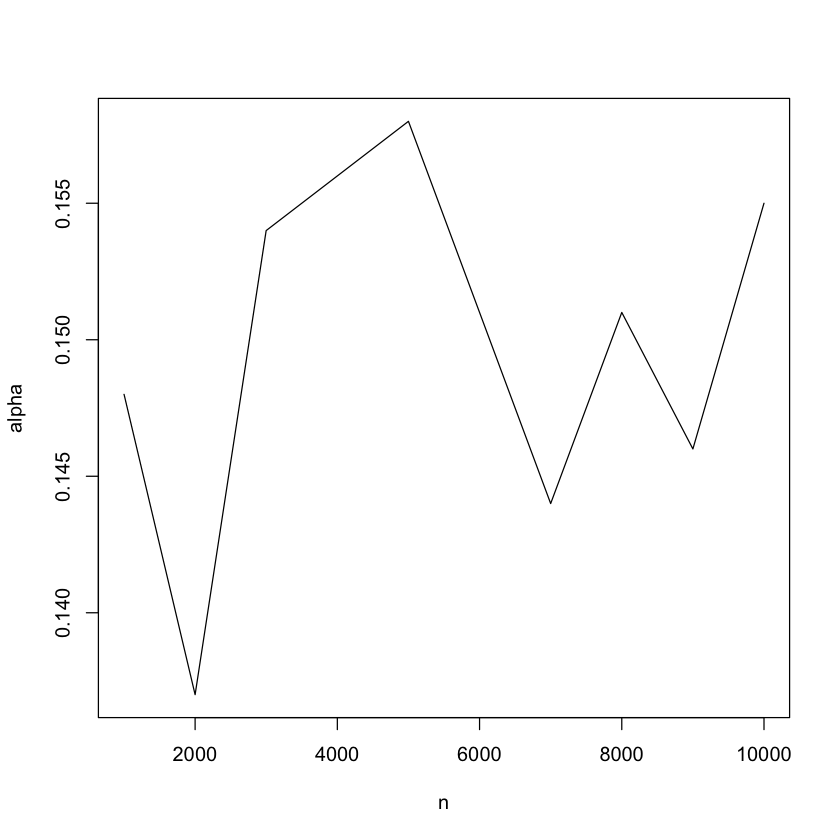

In [3]:
plot(seq(1000, 10000, by = 1000), alphas, type = 'l', xlab = 'n', ylab = 'alpha')

Конкретной зависимости фактического уровня значимости нет. Распределение похоже на равномерное. Средний уровень значимости в районе 0.14.

In [4]:
alpha = 0.05
tries = 1000
errors_counter = 0
n = 500
for (i in 1:tries) {
    m <- 5
    theta <- matrix(rep(1, m))
    errors = vector(length = 0)
    for (j in 1:n) {
        errors <- c(errors, rlaplace(n = 1, s = (1 + j / n)))
    }
    X <- matrix(rep(1, n * m), ncol=m)
    Y <- X %*% theta + errors
    data <- cbind(X, Y)
    colnames(data) <- c("V1", "V2", "V3", "V4", "V5", "V6")
    data <- data.frame(data)
    model <- lm(formula = V6 ~ V1 + V2 + V3 + V4 + V5, data = data)
    if (gqtest(model)$p.value < alpha) {
        errors_counter <- errors_counter + 1
    }
}
print(errors_counter / tries)

[1] 0.982


Если дисперсии увеличиатся вдоль вектора, т.е. гетероскедостичности нет, то гипотеза отвергается с достаточно большой частотой.